# Lab 4 - Phân Vùng Ảnh


# 1. Cài đặt thư viện


In [ ]:
pip install opencv-python

# 2. Viết chương trình phân vùng ảnh

2.1 Phân vùng  theo histogram

2.1.1 Phương pháp Otsu

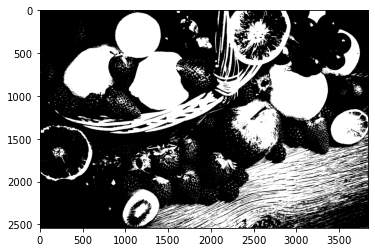

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

thres = threshold_otsu(a)

b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.1.2 Phương pháp Adaptive Thresholding

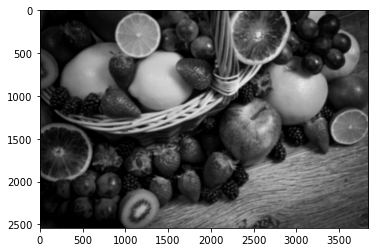

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.2 phân vùng theo region

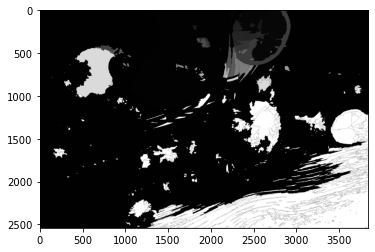

In [3]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('fruit.jpg')

a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


b2 = cv2.erode(b1, None, iterations=2)

dist_trans = cv2.distanceTransform(b2, cv2.DIST_L2, 3)


thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

2.3 Biến đổi đối tượng trong ảnh

2.3.1 Sử dụng binary dilation

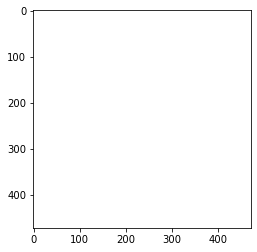

In [1]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label 
import matplotlib.pylab as plt
from skimage.filters import threshold_local 


data = Image.open('dil_img.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.2 Sử dụng binary_Opening

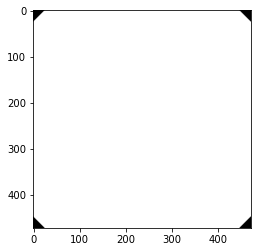

In [2]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label # This import is present in the image but not used in the provided code snippet
import matplotlib.pylab as plt
from skimage.filters import threshold_local # This import is present in the image but not used in the provided code snippet

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

In [ ]:
2.3.3 Sử dụng binary_erosion

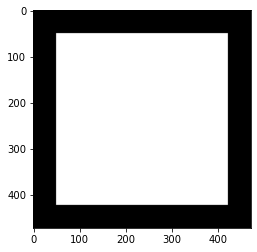

In [5]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label # This import is present in the image but not used in the provided code snippet
import matplotlib.pylab as plt
from skimage.filters import threshold_local # This import is present in the image but not used in the provided code snippet

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.4  Sử dụng binary_closing

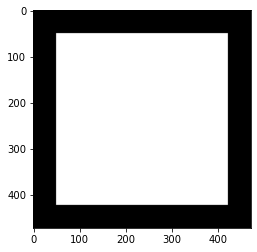

In [6]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label # This import is present in the image but not used in the provided code snippet
import matplotlib.pylab as plt
from skimage.filters import threshold_local # This import is present in the image but not used in the provided code snippet

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

# Bài Tập

# 1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.

Ảnh đã phân vùng được lưu tại 'lang_biang.jpg'


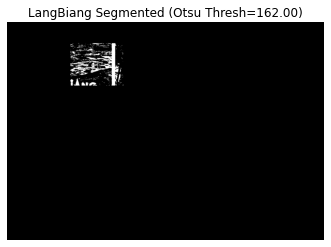

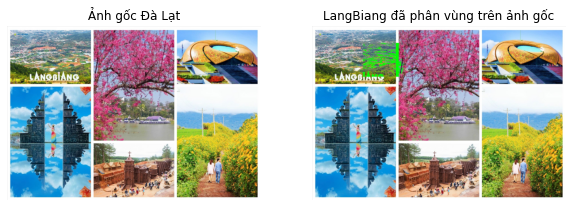

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import os

image_path = os.path.join('exercise', 'dalat.jpg')

y1_original, y2_original = 100, 300
x1_original, x2_original = 200, 450

img_bgr = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

translation_x = 100
x1_translated = x1_original + translation_x
x2_translated = x2_original + translation_x

img_height, img_width = img_gray.shape
x1_translated = max(0, x1_translated)
x2_translated = min(img_width, x2_translated)
y1_original = max(0, y1_original)
y2_original = min(img_height, y2_original)

translated_region_raw = img_gray[y1_original:y2_original, x1_translated:x2_translated]

otsu_threshold = threshold_otsu(translated_region_raw)
binary_langbiang_region = translated_region_raw > otsu_threshold

final_segmented_image = np.zeros_like(img_gray, dtype=np.uint8)
binary_display = (binary_langbiang_region * 255).astype(np.uint8)
final_segmented_image[y1_original:y2_original, x1_translated:x2_translated] = binary_display

output_filename = 'lang_biang.jpg'
cv2.imwrite(output_filename, final_segmented_image)
print(f"Ảnh đã phân vùng được lưu tại '{output_filename}'")

plt.imshow(final_segmented_image, cmap='gray')
plt.title(f'LangBiang Segmented (Otsu Thresh={otsu_threshold:.2f})')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_bgr[:,:,::-1])
plt.title('Ảnh gốc Đà Lạt')
plt.axis('off')

plt.subplot(1, 2, 2)
highlighted_img = img_bgr.copy()
mask = np.zeros_like(img_gray, dtype=np.uint8)
mask[y1_original:y2_original, x1_translated:x2_translated] = binary_display
highlighted_img[mask > 0] = [0, 255, 0]
plt.imshow(highlighted_img[:,:,::-1])
plt.title('LangBiang đã phân vùng trên ảnh gốc')
plt.axis('off')
plt.show()

# Bài 2 Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là ho_xuan_huong.jpg.

Ảnh kết quả được lưu tại: 'ho_xuan_huong.jpg'


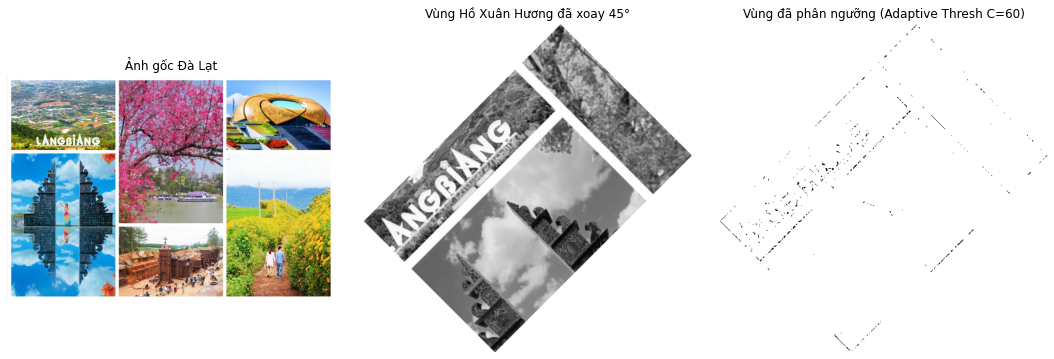

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = os.path.join('exercise', 'dalat.jpg')

y1_original, y2_original = 250, 550
x1_original, x2_original = 150, 600

img_bgr = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_height, img_width = img_gray.shape
y1_original = max(0, y1_original)
y2_original = min(img_height, y2_original)
x1_original = max(0, x1_original)
x2_original = min(img_width, x2_original)

ho_xuan_huong_region = img_gray[y1_original:y2_original, x1_original:x2_original].copy()

(h, w) = ho_xuan_huong_region.shape
center = (w // 2, h // 2)
angle = 45

M = cv2.getRotationMatrix2D(center, angle, 1.0)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

M[0, 2] += (nW / 2) - center[0]
M[1, 2] += (nH / 2) - center[1]

rotated_region = cv2.warpAffine(ho_xuan_huong_region, M, (nW, nH), borderValue=255)

block_size = 11
C_value = 60

thresh_region = cv2.adaptiveThreshold(rotated_region, 255,
                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, block_size, C_value)

output_filename = 'ho_xuan_huong.jpg'
cv2.imwrite(output_filename, thresh_region)
print(f"Ảnh kết quả được lưu tại: '{output_filename}'")

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_bgr[:, :, ::-1])
plt.title('Ảnh gốc Đà Lạt')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rotated_region, cmap='gray')
plt.title('Vùng Hồ Xuân Hương đã xoay 45°')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresh_region, cmap='gray')
plt.title(f'Vùng đã phân ngưỡng (Adaptive Thresh C={C_value})')
plt.axis('off')

plt.tight_layout()
plt.show()

# 3.Viết chương trình chọn Quảng trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg."

Ảnh kết quả được lưu tại: 'quan_truong_lam_vien.jpg'


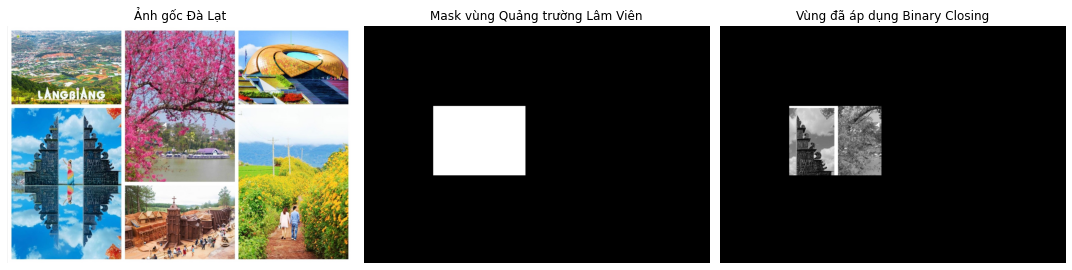

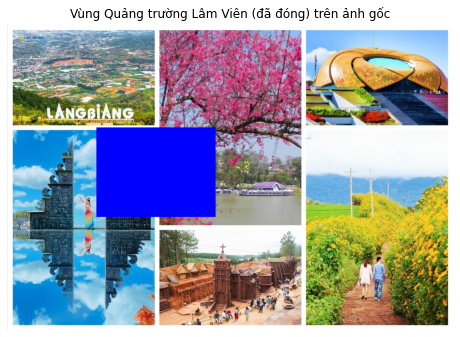

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import binary_closing

image_path = os.path.join('exercise', 'dalat.jpg')

y1, y2 = 350, 650
x1, x2 = 300, 700

img_bgr = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_height, img_width = img_gray.shape
y1 = max(0, y1)
y2 = min(img_height, y2)
x1 = max(0, x1)
x2 = min(img_width, x2)

mask = np.zeros_like(img_gray, dtype=np.uint8)
mask[y1:y2, x1:x2] = 255

mask_boolean = mask > 0

struct_element = np.ones((5,5), dtype=bool)
closed_mask_boolean = binary_closing(mask_boolean, structure=struct_element, iterations=1)
closed_mask = (closed_mask_boolean * 255).astype(np.uint8)

final_image = cv2.bitwise_and(img_gray, img_gray, mask=closed_mask)

output_filename = 'quan_truong_lam_vien.jpg'
cv2.imwrite(output_filename, final_image)
print(f"Ảnh kết quả được lưu tại: '{output_filename}'")

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_bgr[:, :, ::-1])
plt.title('Ảnh gốc Đà Lạt')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask vùng Quảng trường Lâm Viên')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_image, cmap='gray')
plt.title('Vùng đã áp dụng Binary Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

highlighted_img = img_bgr.copy()
highlighted_img[closed_mask > 0] = [255, 0, 0]
plt.figure(figsize=(8, 8))
plt.imshow(highlighted_img[:, :, ::-1])
plt.title('Vùng Quảng trường Lâm Viên (đã đóng) trên ảnh gốc')
plt.axis('off')
plt.show()

# 4.Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment)"


--- Menu Xử lý ảnh ---
geometric_transformation
  1. coordinate_mapping
  2. Rotate
  3. Scale
  4. Shift
segment
  5. Adaptive_thresholding
  6. Binary_dilation
  7. Binary_erosion
  8. Otsu
-------------------------
9. Kết hợp 2 chức năng (1 geometric_transformation + 1 segment)
0. Thoát
-------------------------


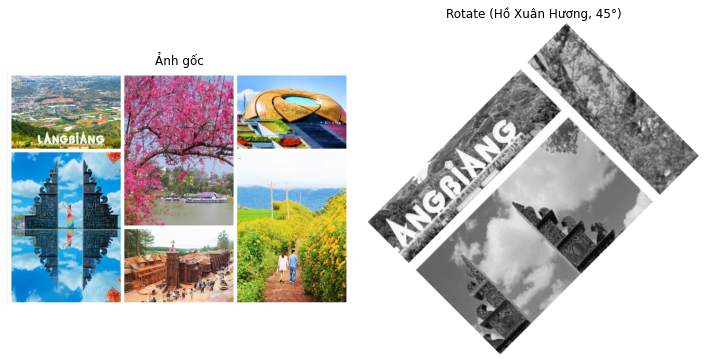


--- Menu Xử lý ảnh ---
geometric_transformation
  1. coordinate_mapping
  2. Rotate
  3. Scale
  4. Shift
segment
  5. Adaptive_thresholding
  6. Binary_dilation
  7. Binary_erosion
  8. Otsu
-------------------------
9. Kết hợp 2 chức năng (1 geometric_transformation + 1 segment)
0. Thoát
-------------------------
Thoát chương trình. Tạm biệt!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.filters import threshold_otsu
from scipy.ndimage import binary_dilation, binary_erosion

IMAGE_PATH = os.path.join('exercise', 'dalat.jpg')

LANG_BIANG_COORDS = {'y1': 100, 'y2': 300, 'x1': 200, 'x2': 450}
HO_XUAN_HUONG_COORDS = {'y1': 250, 'y2': 550, 'x1': 150, 'x2': 600}
QUAN_TRUONG_LAM_VIEN_COORDS = {'y1': 350, 'y2': 650, 'x1': 300, 'x2': 700}

def display_menu():
    print("\n--- Menu Xử lý ảnh ---")
    print("geometric_transformation")
    print("  1. coordinate_mapping")
    print("  2. Rotate")
    print("  3. Scale")
    print("  4. Shift")
    print("segment")
    print("  5. Adaptive_thresholding")
    print("  6. Binary_dilation")
    print("  7. Binary_erosion")
    print("  8. Otsu")
    print("-------------------------")
    print("9. Kết hợp 2 chức năng (1 geometric_transformation + 1 segment)")
    print("0. Thoát")
    print("-------------------------")

def get_user_choice(prompt):
    while True:
        choice = input(prompt).strip()
        if choice.lower() == 'thoat' or choice == '0':
            return '0'
        return choice

def process_single_function(choice, img_bgr, img_gray):
    result_img = None
    title = ""
    coords = None

    img_height, img_width = img_gray.shape

    if choice == '1': # coordinate_mapping
        coords = QUAN_TRUONG_LAM_VIEN_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        mask = np.zeros_like(img_gray, dtype=np.uint8)
        mask[y1:y2, x1:x2] = 255
        result_img = cv2.bitwise_and(img_gray, img_gray, mask=mask)
        title = "Coordinate Mapping (Quảng trường Lâm Viên)"

    elif choice == '2': # Rotate
        coords = HO_XUAN_HUONG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        (h, w) = region.shape
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 45, 1.0)
        cos, sin = np.abs(M[0, 0]), np.abs(M[0, 1])
        nW, nH = int((h * sin) + (w * cos)), int((h * cos) + (w * sin))
        M[0, 2] += (nW / 2) - center[0]
        M[1, 2] += (nH / 2) - center[1]
        result_img = cv2.warpAffine(region, M, (nW, nH), borderValue=255)
        title = "Rotate (Hồ Xuân Hương, 45°)"

    elif choice == '3': # Scale
        coords = LANG_BIANG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        scale_factor = 0.5
        new_width, new_height = int(region.shape[1] * scale_factor), int(region.shape[0] * scale_factor)
        result_img = cv2.resize(region, (new_width, new_height), interpolation=cv2.INTER_AREA)
        title = f"Scale (LangBiang, {scale_factor*100:.0f}%)"

    elif choice == '4': # Shift
        coords = LANG_BIANG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        shift_x, shift_y = 100, 0
        
        shifted_canvas = np.zeros_like(img_gray, dtype=np.uint8)
        new_x1, new_y1 = x1 + shift_x, y1 + shift_y
        new_x2, new_y2 = x2 + shift_x, y2 + shift_y

        new_x1, new_y1 = max(0, new_x1), max(0, new_y1)
        new_x2, new_y2 = min(img_width, new_x2), min(img_height, new_y2)

        current_width, current_height = x2 - x1, y2 - y1

        if new_x2 - new_x1 == current_width and new_y2 - new_y1 == current_height:
             shifted_canvas[new_y1:new_y2, new_x1:new_x2] = region
             result_img = shifted_canvas
        else:
             result_img = img_gray[new_y1:new_y2, new_x1:new_x2]
        title = f"Shift (LangBiang, +{shift_x}px ngang)"

    elif choice == '5': # Adaptive_thresholding
        coords = HO_XUAN_HUONG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        
        block_size, C_value = 11, 60
        if block_size % 2 == 0: block_size += 1
        if block_size < 3: block_size = 3
        
        result_img = cv2.adaptiveThreshold(region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C_value)
        title = "Adaptive Thresholding (Hồ Xuân Hương, C=60)"

    elif choice == '6': # Binary_dilation
        coords = QUAN_TRUONG_LAM_VIEN_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        mask = np.zeros_like(img_gray, dtype=np.uint8)
        mask[y1:y2, x1:x2] = 255
        
        result_img = (binary_dilation(mask > 0, iterations=5) * 255).astype(np.uint8)
        title = "Binary Dilation (Quảng trường Lâm Viên, 5 iter.)"
    
    elif choice == '7': # Binary_erosion
        coords = QUAN_TRUONG_LAM_VIEN_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        mask = np.zeros_like(img_gray, dtype=np.uint8)
        mask[y1:y2, x1:x2] = 255
        
        result_img = (binary_erosion(mask > 0, iterations=5) * 255).astype(np.uint8)
        title = "Binary Erosion (Quảng trường Lâm Viên, 5 iter.)"

    elif choice == '8': # Otsu
        coords = LANG_BIANG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        
        _, result_img = cv2.threshold(region, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        title = "Otsu Thresholding (LangBiang)"

    if result_img is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_bgr[:, :, ::-1])
        plt.title('Ảnh gốc')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(result_img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

def process_combined_functions(geo_choice, seg_choice, img_bgr, img_gray):
    intermediate_img = None
    geo_title = ""
    seg_title = ""

    img_height, img_width = img_gray.shape

    if geo_choice == '1': # coordinate_mapping
        coords = QUAN_TRUONG_LAM_VIEN_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        mask = np.zeros_like(img_gray, dtype=np.uint8)
        mask[y1:y2, x1:x2] = 255
        intermediate_img = cv2.bitwise_and(img_gray, img_gray, mask=mask)
        geo_title = "Coordinate Mapping"
    elif geo_choice == '2': # Rotate
        coords = HO_XUAN_HUONG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        (h, w) = region.shape
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 45, 1.0)
        cos, sin = np.abs(M[0, 0]), np.abs(M[0, 1])
        nW, nH = int((h * sin) + (w * cos)), int((h * cos) + (w * sin))
        M[0, 2] += (nW / 2) - center[0]
        M[1, 2] += (nH / 2) - center[1]
        intermediate_img = cv2.warpAffine(region, M, (nW, nH), borderValue=255)
        geo_title = "Rotate (45°)"
    elif geo_choice == '3': # Scale
        coords = LANG_BIANG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        scale_factor = 0.7
        new_width, new_height = int(region.shape[1] * scale_factor), int(region.shape[0] * scale_factor)
        intermediate_img = cv2.resize(region, (new_width, new_height), interpolation=cv2.INTER_AREA)
        geo_title = f"Scale ({scale_factor*100:.0f}%)"
    elif geo_choice == '4': # Shift
        coords = LANG_BIANG_COORDS
        y1, y2, x1, x2 = coords['y1'], coords['y2'], coords['x1'], coords['x2']
        y1, y2, x1, x2 = max(0, y1), min(img_height, y2), max(0, x1), min(img_width, x2)
        region = img_gray[y1:y2, x1:x2].copy()
        shift_x, shift_y = 50, 50
        
        shifted_canvas = np.zeros_like(img_gray, dtype=np.uint8)
        new_x1, new_y1 = x1 + shift_x, y1 + shift_y
        new_x2, new_y2 = x2 + shift_x, y2 + shift_y

        new_x1, new_y1 = max(0, new_x1), max(0, new_y1)
        new_x2, new_y2 = min(img_width, new_x2), min(img_height, new_y2)

        current_width, current_height = x2 - x1, y2 - y1

        if new_x2 - new_x1 == current_width and new_y2 - new_y1 == current_height:
             shifted_canvas[new_y1:new_y2, new_x1:new_x2] = region
             intermediate_img = shifted_canvas
        else:
             intermediate_img = img_gray[new_y1:new_y2, new_x1:new_x2]
        geo_title = f"Shift (+{shift_x}x, +{shift_y}y)"
        
    if intermediate_img is None:
        print("Lỗi: Không thể thực hiện biến đổi hình học.")
        return

    final_img = None
    if seg_choice == '5': # Adaptive_thresholding
        block_size, C_value = 11, 60
        if block_size % 2 == 0: block_size += 1
        if block_size < 3: block_size = 3
        final_img = cv2.adaptiveThreshold(intermediate_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C_value)
        seg_title = "Adaptive Thresholding"
    elif seg_choice == '6': # Binary_dilation
        final_img = (binary_dilation(intermediate_img > 0, iterations=3) * 255).astype(np.uint8)
        seg_title = "Binary Dilation"
    elif seg_choice == '7': # Binary_erosion
        final_img = (binary_erosion(intermediate_img > 0, iterations=3) * 255).astype(np.uint8)
        seg_title = "Binary Erosion"
    elif seg_choice == '8': # Otsu
        _, final_img = cv2.threshold(intermediate_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        seg_title = "Otsu Thresholding"

    if final_img is not None:
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img_bgr[:, :, ::-1])
        plt.title('Ảnh gốc')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(intermediate_img, cmap='gray')
        plt.title(f'Bước 1: {geo_title}')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(final_img, cmap='gray')
        plt.title(f'Bước 2: {seg_title}')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

def main():
    if not os.path.exists(IMAGE_PATH):
        print(f"Lỗi: Không tìm thấy ảnh '{IMAGE_PATH}'. Vui lòng đảm bảo ảnh và thư mục 'exercise' tồn tại.")
        return

    img_bgr = cv2.imread(IMAGE_PATH)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    while True:
        display_menu()
        choice = get_user_choice("Nhập lựa chọn của bạn (0-9): ")

        if choice == '0':
            print("Thoát chương trình. Tạm biệt!")
            break
        elif choice in ['1', '2', '3', '4', '5', '6', '7', '8']:
            process_single_function(choice, img_bgr, img_gray)
        elif choice == '9':
            print("\n--- Chọn chức năng kết hợp ---")
            geo_choice = get_user_choice("Chọn chức năng geometric_transformation (1-4): ")
            if geo_choice not in ['1', '2', '3', '4']:
                print("Lựa chọn biến đổi hình học không hợp lệ.")
                continue

            seg_choice = get_user_choice("Chọn chức năng segment (5-8): ")
            if seg_choice not in ['5', '6', '7', '8']:
                print("Lựa chọn phân đoạn không hợp lệ.")
                continue
            
            process_combined_functions(geo_choice, seg_choice, img_bgr, img_gray)
        else:
            print("Lựa chọn không hợp lệ. Vui lòng thử lại.")

if __name__ == "__main__":
    main()